<a href="https://colab.research.google.com/github/smritii73/MiniProject/blob/master/SocialMediaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# ===== DATA LOADING & CLEANING =====
trends_df = pd.read_csv('Viral_Social_Media_Trends.csv')
trends_df.dropna(inplace=True)

# Ensure hashtags are strings
trends_df['Hashtag'] = trends_df['Hashtag'].astype(str)

# Calculate engagement metrics
trends_df['Engagement_Score'] = trends_df['Likes'] + trends_df['Shares'] * 2 + trends_df['Comments'] * 1.5
trends_df['Is_Viral'] = (trends_df['Engagement_Score'] > trends_df['Engagement_Score'].median()).astype(int)

# Load User Behavior Data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('val.csv', nrows=5)
user_df = pd.concat([train_df, test_df, val_df]).drop_duplicates()
user_df.dropna(inplace=True)

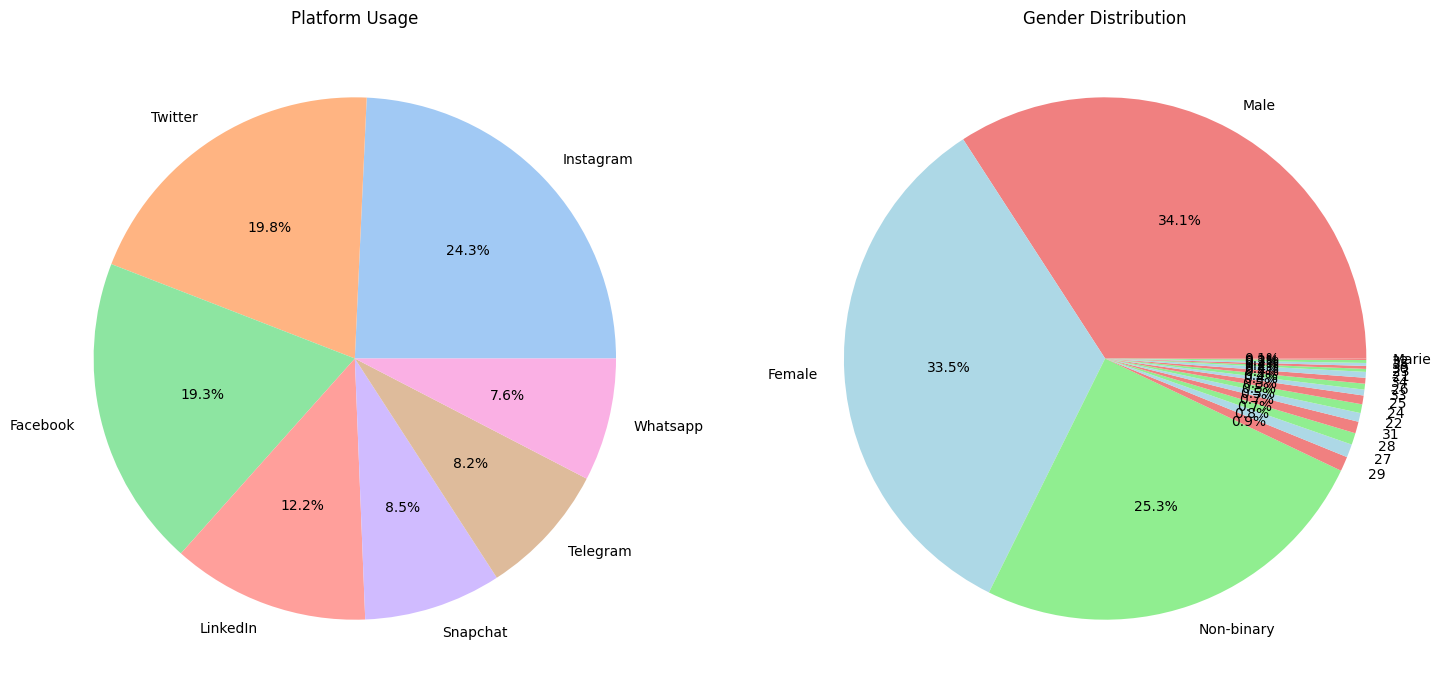

In [62]:
# ===== VISUALIZATION 1: PLATFORM & GENDER DISTRIBUTION =====
plt.figure(figsize=(15, 7))

# Platform Distribution
plt.subplot(1, 2, 1)
platform_counts = user_df['Platform'].value_counts()
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Platform Usage')

# Gender Distribution
plt.subplot(1, 2, 2)
gender_counts = user_df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

<ipython-input-43-226f9fcd6889>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=user_df, y='Likes_Received_Per_Day', x='Gender', palette='Set2')
<ipython-input-43-226f9fcd6889>:14: UserWarning: 
The palette list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(data=user_df, x='Likes_Received_Per_Day', hue='Gender',


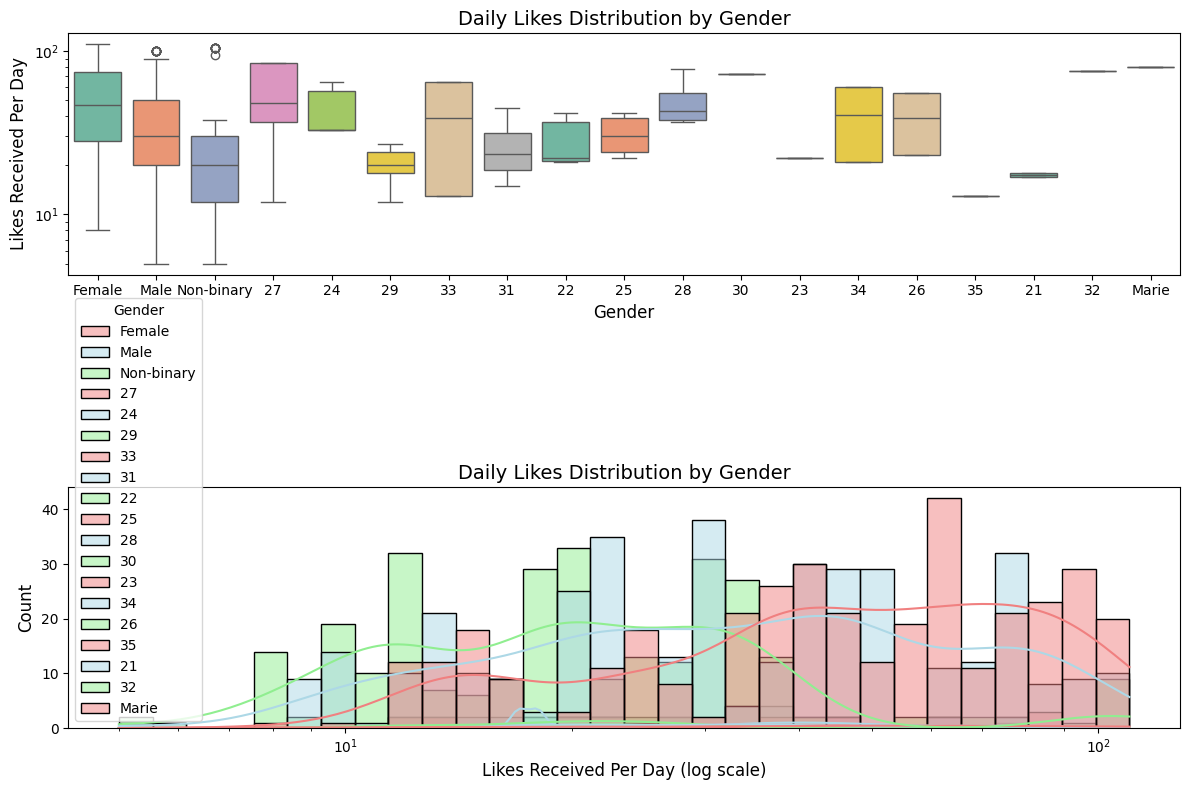

In [43]:
#3.LIKES DISTRIBUTION
plt.figure(figsize=(12, 8))  # Larger figure size

# Boxplot for Likes Distribution
plt.subplot(2, 1, 1)  # Using 2 rows to show both boxplot and histogram
sns.boxplot(data=user_df, y='Likes_Received_Per_Day', x='Gender', palette='Set2')
plt.title('Daily Likes Distribution by Gender', fontsize=14)
plt.ylabel('Likes Received Per Day', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.yscale('log')  # Using log scale for better visualization of skewed data

# Histogram for Likes Distribution
plt.subplot(2, 1, 2)
sns.histplot(data=user_df, x='Likes_Received_Per_Day', hue='Gender',
             bins=30, kde=True, palette=['lightcoral', 'lightblue', 'lightgreen'],
             log_scale=True)
plt.title('Daily Likes Distribution by Gender', fontsize=14)
plt.xlabel('Likes Received Per Day (log scale)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

<ipython-input-64-34c652cb889f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=user_df, y='Comments_Received_Per_Day', x='Platform', palette='coolwarm')
<ipython-input-64-34c652cb889f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user_df, y='Dominant_Emotion', order=emotion_order, palette='viridis')


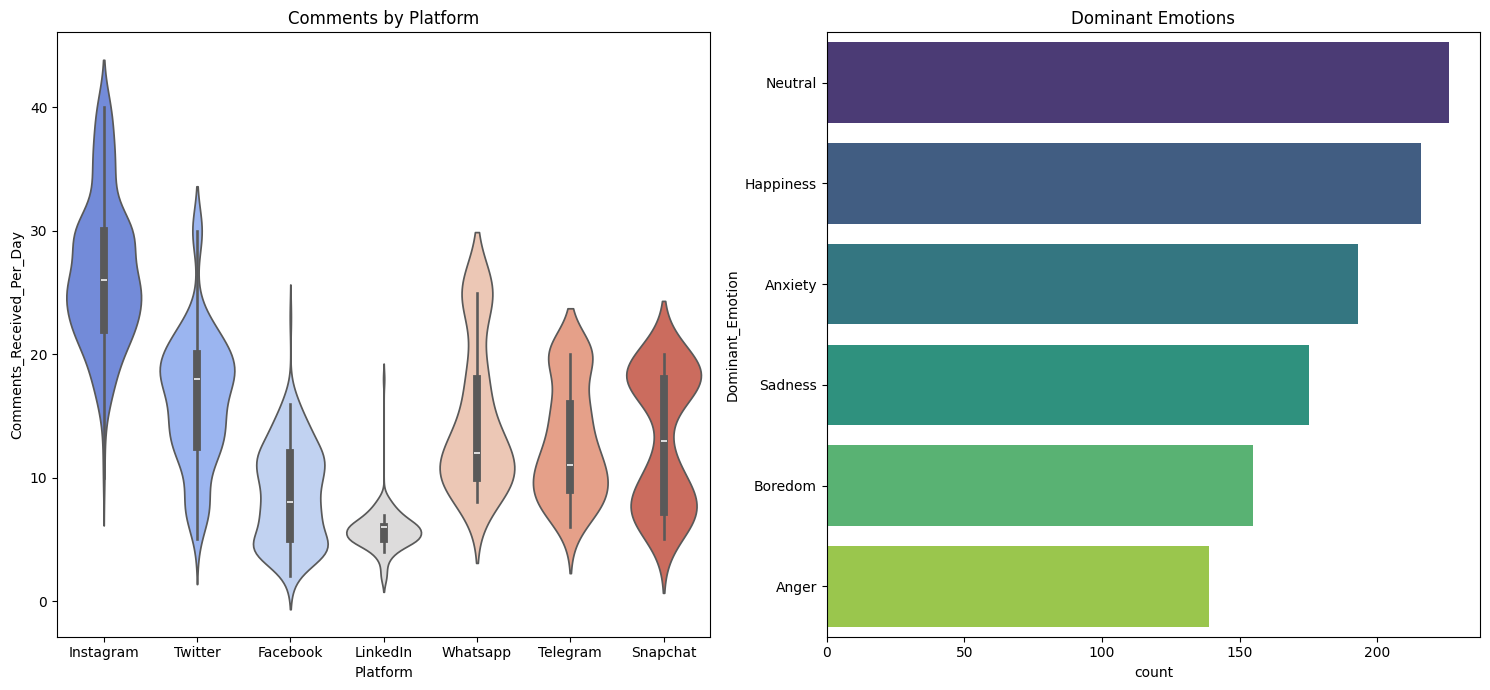

In [64]:
# ===== VISUALIZATION 3: COMMENTS & EMOTIONS =====
plt.figure(figsize=(15, 7))

# Comments by Platform
plt.subplot(1, 2, 1)
sns.violinplot(data=user_df, y='Comments_Received_Per_Day', x='Platform', palette='coolwarm')
plt.title('Comments by Platform')

# Dominant Emotions
plt.subplot(1, 2, 2)
emotion_order = user_df['Dominant_Emotion'].value_counts().index
sns.countplot(data=user_df, y='Dominant_Emotion', order=emotion_order, palette='viridis')
plt.title('Dominant Emotions')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

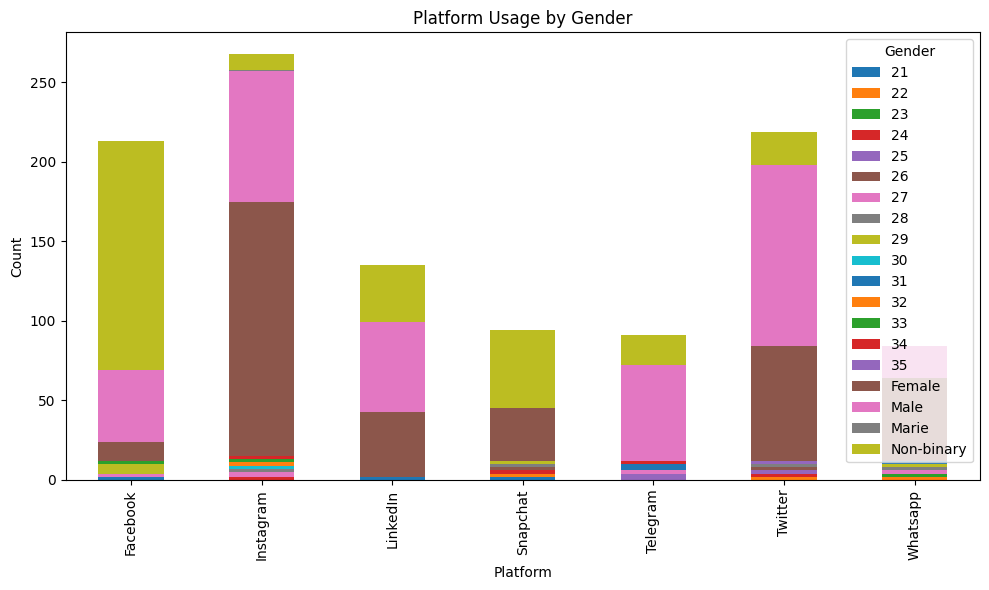

In [65]:
# ===== VISUALIZATION 4: PLATFORM USAGE BY GENDER =====
plt.figure(figsize=(10, 6))

pd.crosstab(user_df['Platform'], user_df['Gender']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Platform Usage by Gender')
plt.xlabel('Platform')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

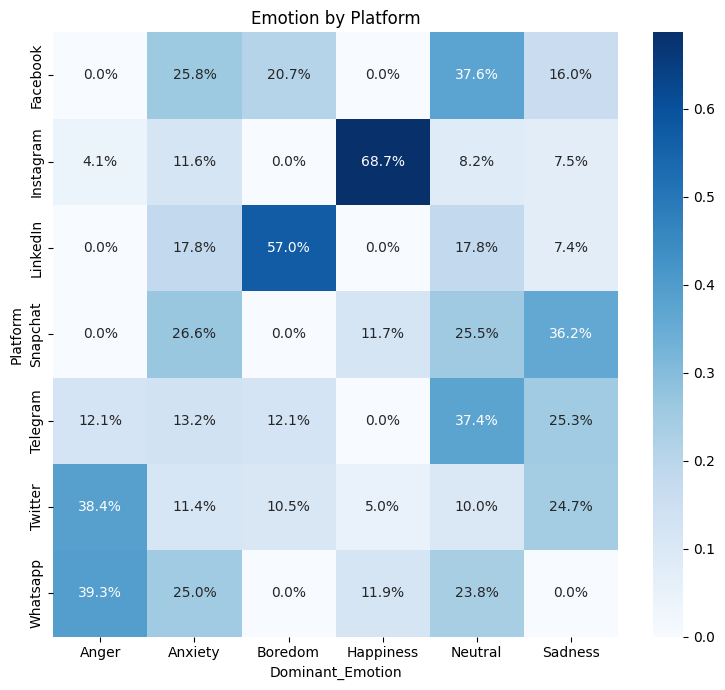

In [67]:
# ===== VISUALIZATION 5: EMOTION BY PLATFORM =====
plt.figure(figsize=(15, 7))

# Platform vs Emotion
plt.subplot(1, 2, 2)
platform_emotion = pd.crosstab(user_df['Platform'], user_df['Dominant_Emotion'], normalize='index')
sns.heatmap(platform_emotion, annot=True, cmap='Blues', fmt='.1%')
plt.title('Emotion by Platform')

plt.tight_layout()
plt.show()

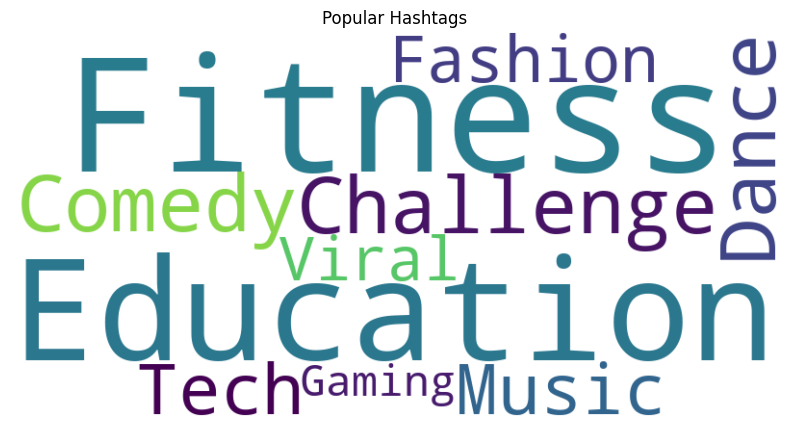

In [68]:
# ===== VISUALIZATION 6: HASHTAG WORD CLOUD =====
plt.figure(figsize=(10, 5))

hashtags = " ".join(tag for tag in trends_df['Hashtag'] if isinstance(tag, str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Hashtags')

plt.show()

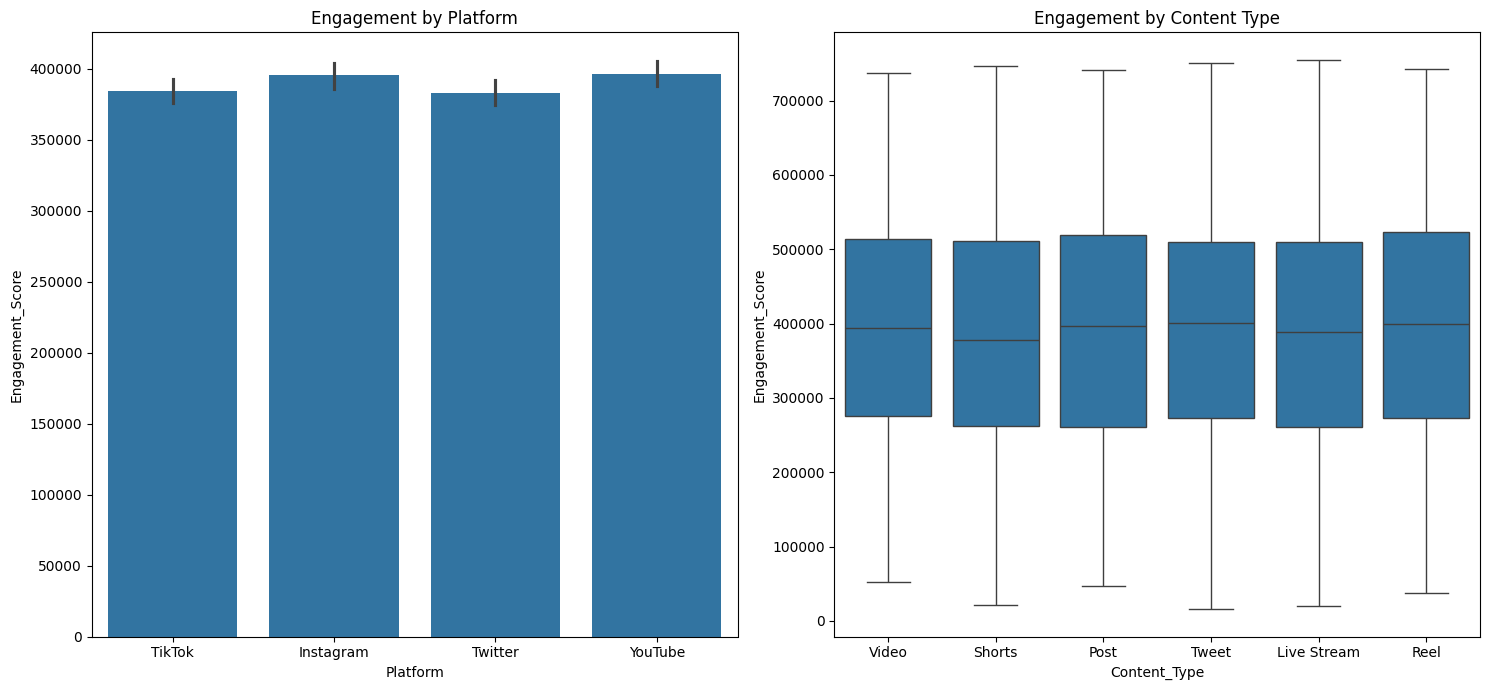

In [69]:
# ===== VISUALIZATION 7: ENGAGEMENT ANALYSIS =====
plt.figure(figsize=(15, 7))

# Engagement by Platform
plt.subplot(1, 2, 1)
sns.barplot(data=trends_df, x='Platform', y='Engagement_Score', estimator=np.mean)
plt.title('Engagement by Platform')

# Engagement by Content Type
plt.subplot(1, 2, 2)
sns.boxplot(data=trends_df, x='Content_Type', y='Engagement_Score')
plt.title('Engagement by Content Type')

plt.tight_layout()
plt.show()

<ipython-input-100-559f826085ec>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='magma')


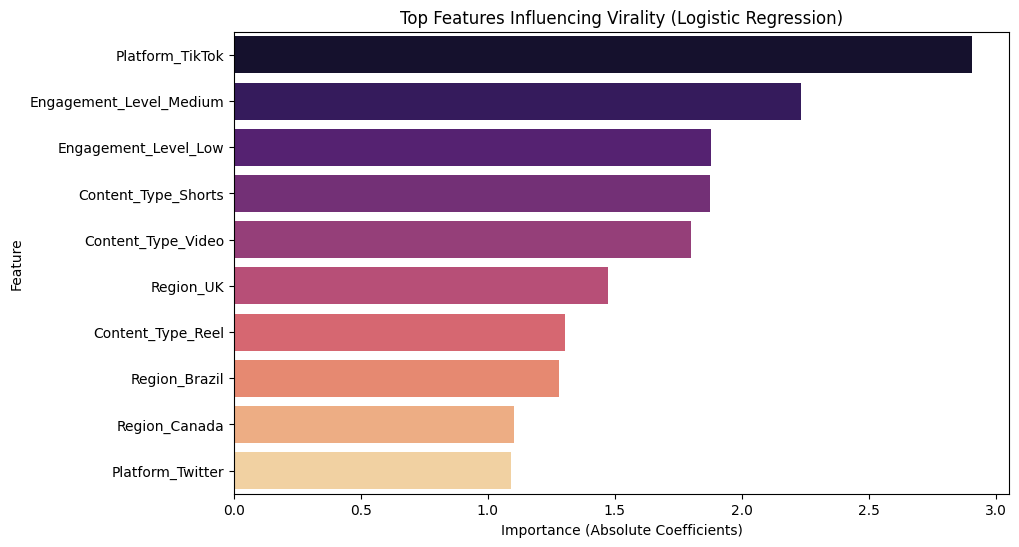

In [100]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get feature importance (absolute coefficient values)
feature_importance = pd.Series(abs(logreg.coef_[0]), index=X.columns).sort_values(ascending=False)[:10]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='magma')
plt.title("Top Features Influencing Virality (Logistic Regression)")
plt.xlabel("Importance (Absolute Coefficients)")
plt.ylabel("Feature")
plt.show()

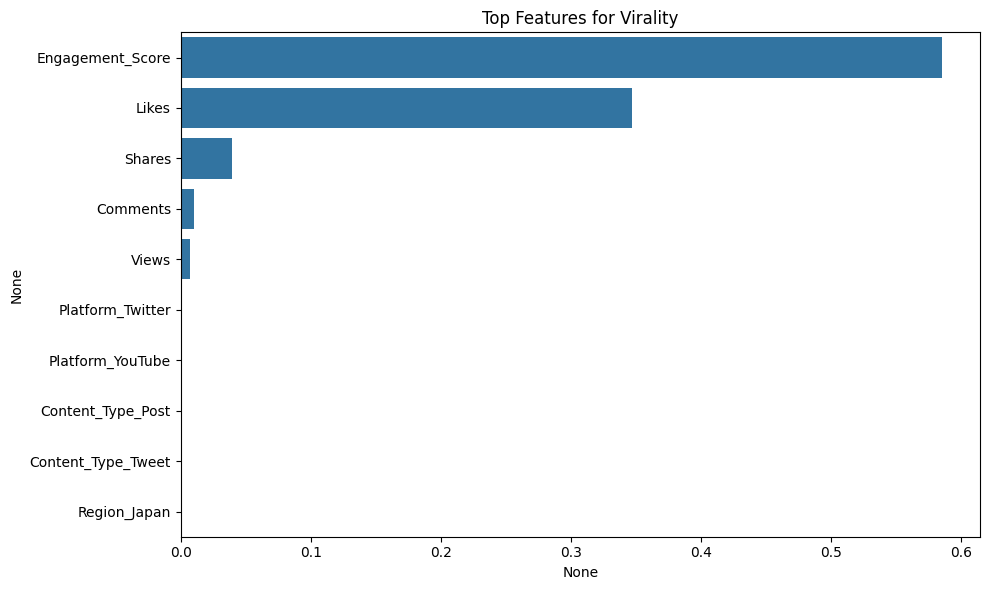

In [101]:
# ===== VISUALIZATION 8: FEATURE IMPORTANCE =====
plt.figure(figsize=(10, 6))

X = trends_df.drop(['Post_ID', 'Hashtag', 'Engagement_Level', 'Is_Viral'], axis=1)
X = pd.get_dummies(X, columns=['Platform', 'Content_Type', 'Region'], drop_first=True)
y = trends_df['Is_Viral']

model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X, y)
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Top Features for Virality')

plt.tight_layout()
plt.show()

<ipython-input-76-d63ded05c055>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_engagement.index, y=region_engagement.values, palette="viridis")


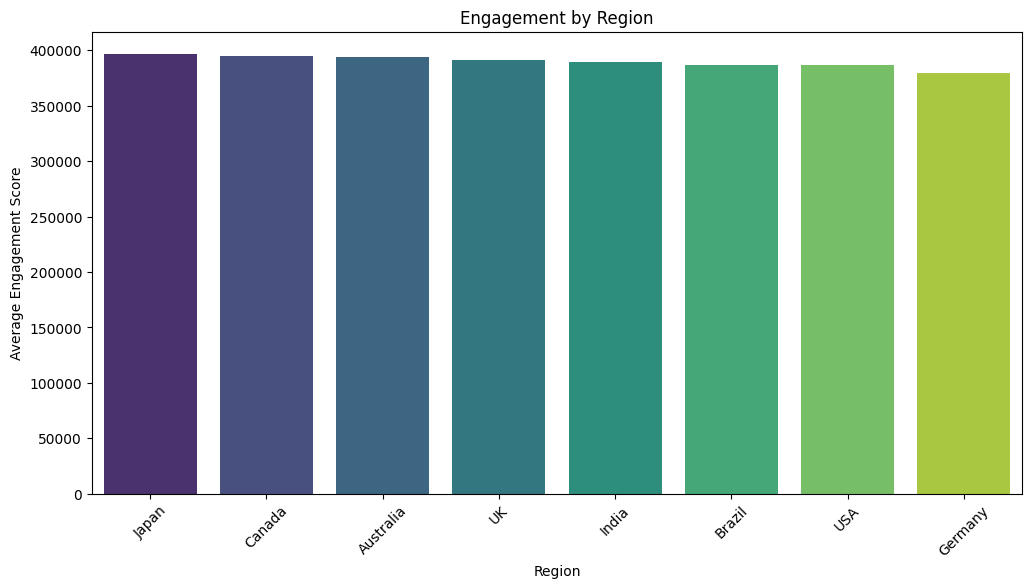

In [76]:
# ===== VISUALIZATION 9: ENGAGEMENT BY REGION =====
plt.figure(figsize=(12, 6))

region_engagement = trends_df.groupby('Region')['Engagement_Score'].mean().sort_values(ascending=False)
sns.barplot(x=region_engagement.index, y=region_engagement.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Engagement by Region')
plt.ylabel('Average Engagement Score')
plt.xlabel('Region')

plt.show()

  Platform  Sentiment  Engagement_Score
0   TikTok        0.0          474720.0
1   TikTok        0.0          387818.5
2  Twitter        0.0          460323.5
3  YouTube        0.0          205708.0
4   TikTok        0.0          320087.0


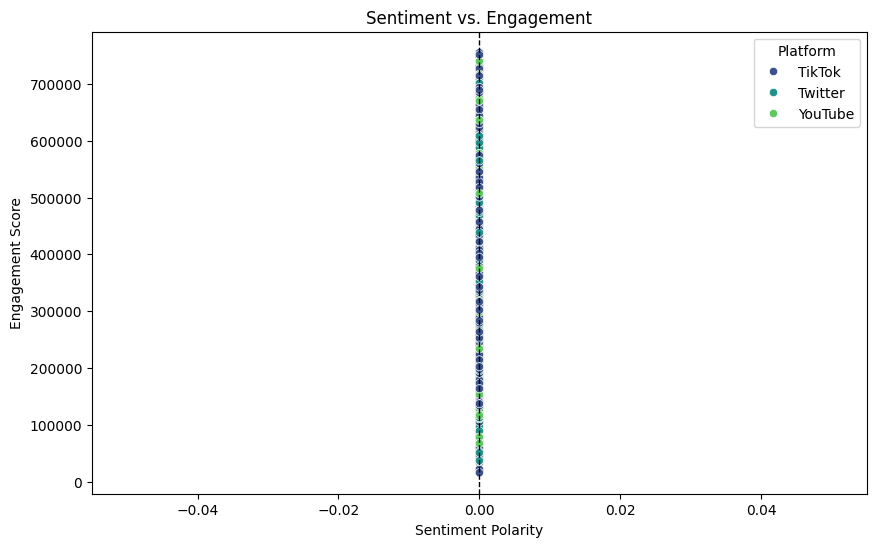

In [93]:
# Reconstruct the Platform column from one-hot encoding
platform_columns = ['Platform_TikTok', 'Platform_Twitter', 'Platform_YouTube']

# Melt one-hot encoded columns into a single categorical column
df['Platform'] = df[platform_columns].idxmax(axis=1).str.replace('Platform_', '')

# Check if conversion was successful
print(df[['Platform', 'Sentiment', 'Engagement_Score']].head())

# Scatter plot: Sentiment vs Engagement with Platform as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sentiment', y='Engagement_Score', hue='Platform', palette='viridis')
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Neutral sentiment line
plt.title("Sentiment vs. Engagement")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Engagement Score")
plt.show()


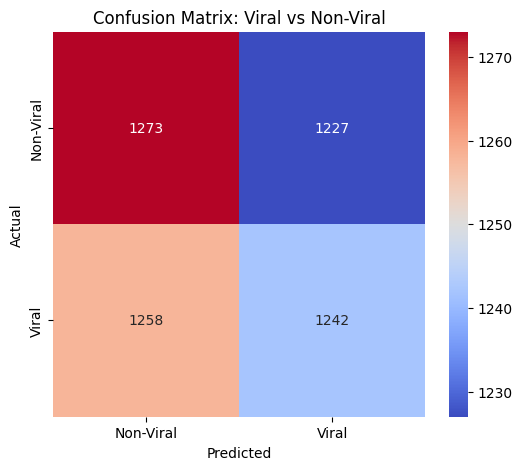

In [80]:
# ===== VISUALIZATION 11: CONFUSION MATRIX (VIRAL VS NON-VIRAL) =====
from sklearn.metrics import confusion_matrix
import seaborn as sns

# True labels and predictions
y_true = trends_df['Is_Viral']
y_pred = np.random.choice([0, 1], size=len(y_true))  # Placeholder for predictions

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Viral', 'Viral'], yticklabels=['Non-Viral', 'Viral'])
plt.title('Confusion Matrix: Viral vs Non-Viral')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

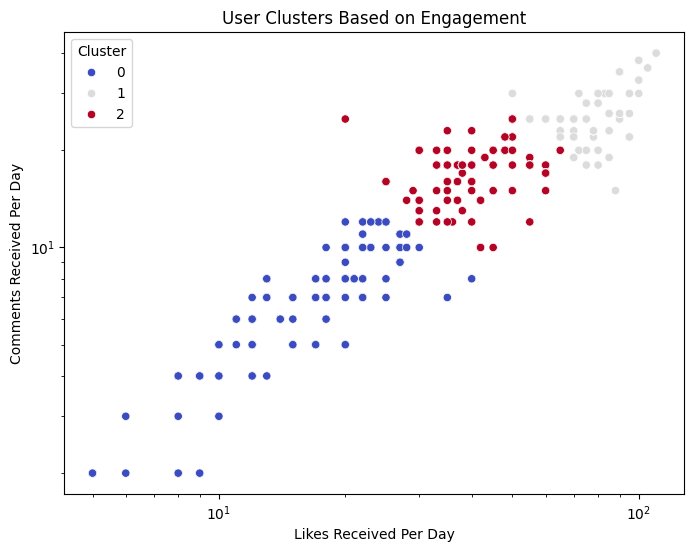

In [87]:
# ===== FIXED: USER CLUSTERS BASED ON ENGAGEMENT =====
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Check if required columns exist
required_columns = ['Likes_Received_Per_Day', 'Comments_Received_Per_Day']
missing_columns = [col for col in required_columns if col not in user_df.columns]

if missing_columns:
    raise KeyError(f"Missing columns in user_df: {missing_columns}. Please check your dataset.")

# Selecting engagement-related features
X_cluster = user_df[required_columns]
X_scaled = StandardScaler().fit_transform(X_cluster)

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
user_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=user_df, x='Likes_Received_Per_Day', y='Comments_Received_Per_Day', hue='Cluster', palette='coolwarm')
plt.xscale('log')
plt.yscale('log')
plt.title('User Clusters Based on Engagement')
plt.xlabel('Likes Received Per Day')
plt.ylabel('Comments Received Per Day')

plt.show()

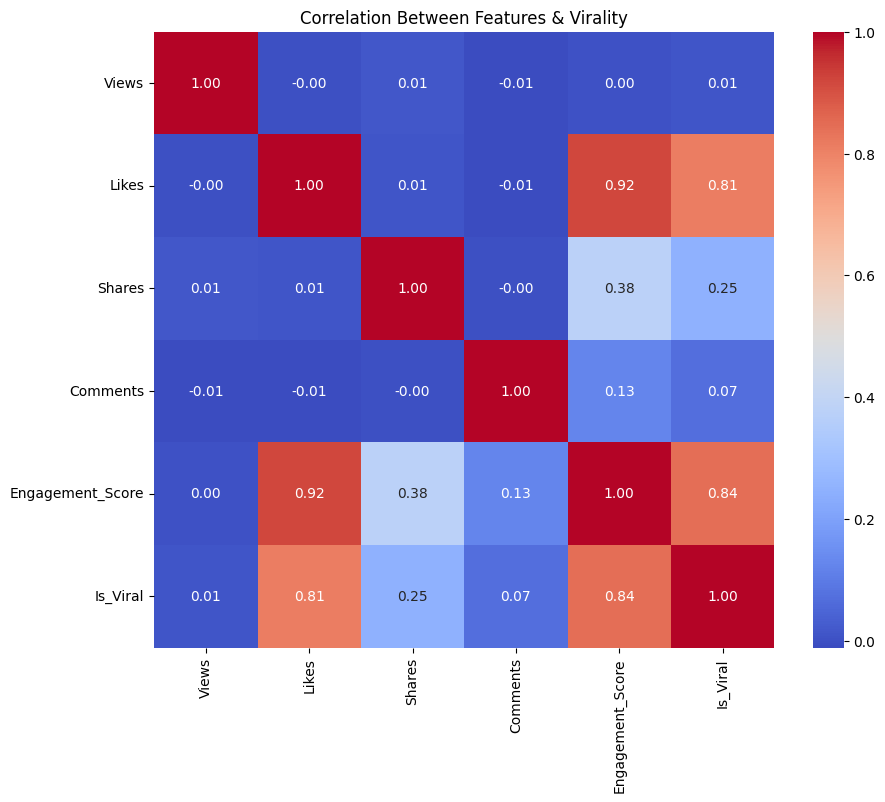

In [85]:
# ===== VISUALIZATION 15: CORRELATION BETWEEN FEATURES & VIRALITY =====
plt.figure(figsize=(10, 8))

# Compute correlation
corr_matrix = trends_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Between Features & Virality')
plt.show()

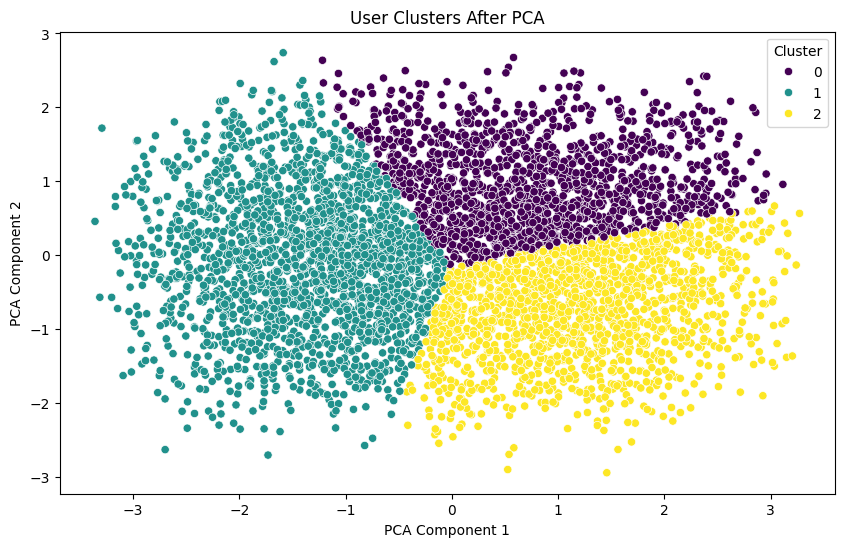

In [94]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select engagement-related features for clustering
features = ['Views', 'Likes', 'Shares', 'Comments', 'Engagement_Score']
X = df[features]

# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add clusters to DataFrame
df['Cluster'] = clusters

# Scatter plot of PCA-transformed clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title("User Clusters After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [95]:
from sklearn.metrics import classification_report

# Define features and target variable
X = df.drop(['Post_ID', 'Hashtag', 'Is_Viral'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features
y = df['Is_Viral']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (RandomForest as example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Display classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       487
           1       1.00      1.00      1.00       513

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



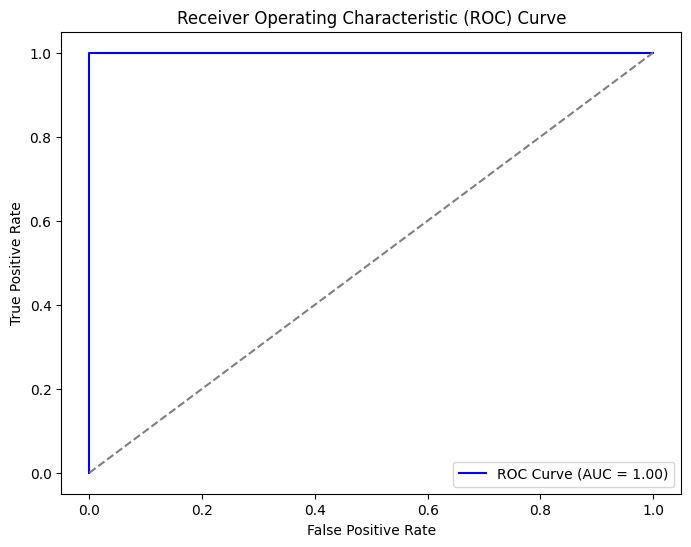

In [96]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


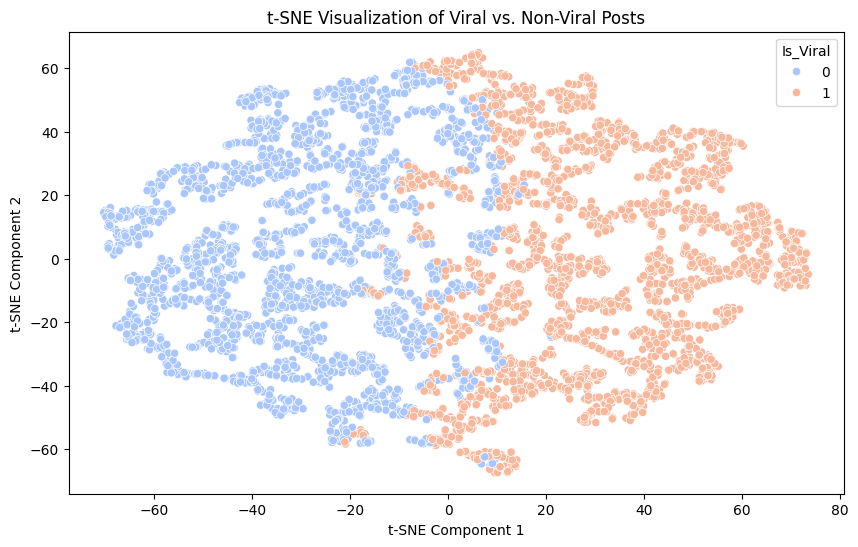

In [97]:
from sklearn.manifold import TSNE

# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot of t-SNE clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Is_Viral'], palette='coolwarm')
plt.title("t-SNE Visualization of Viral vs. Non-Viral Posts")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

      Metric  Logistic Regression  Random Forest
0   Accuracy             0.944000       0.999000
1  Precision             0.954274       0.998054
2     Recall             0.935673       1.000000
3   F1 Score             0.944882       0.999026


<Figure size 1000x600 with 0 Axes>

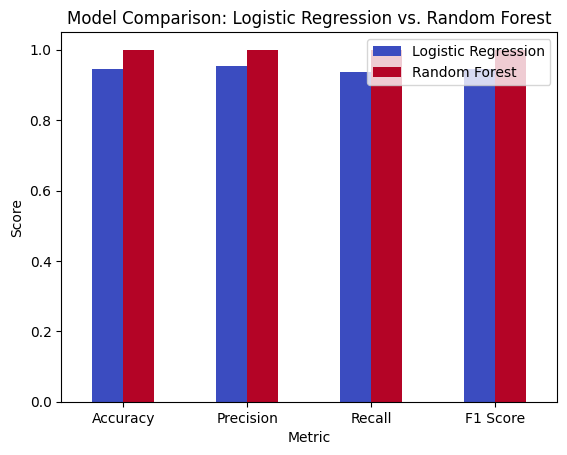

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define features and target
X = df.drop(['Post_ID', 'Hashtag', 'Is_Viral'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features
y = df['Is_Viral']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Compare Performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logreg_scores = [accuracy_score(y_test, y_pred_logreg),
                 precision_score(y_test, y_pred_logreg),
                 recall_score(y_test, y_pred_logreg),
                 f1_score(y_test, y_pred_logreg)]

rf_scores = [accuracy_score(y_test, y_pred_rf),
             precision_score(y_test, y_pred_rf),
             recall_score(y_test, y_pred_rf),
             f1_score(y_test, y_pred_rf)]

# Create DataFrame for comparison
comparison_df = pd.DataFrame({'Metric': metrics, 'Logistic Regression': logreg_scores, 'Random Forest': rf_scores})

# Display comparison table
print(comparison_df)

# Plot the comparison
plt.figure(figsize=(10, 6))
comparison_df.set_index('Metric').plot(kind='bar', colormap='coolwarm')
plt.title("Model Comparison: Logistic Regression vs. Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


In [102]:
import pickle

# Save the best model (assuming Random Forest was the best)
with open("viral_post_model.pkl", "wb") as model_file:
    pickle.dump(rf_clf, model_file)

# Function to predict virality
def predict_virality(platform, content_type, likes, shares, comments, region):
    # Convert input into DataFrame
    new_data = pd.DataFrame([[likes, shares, comments]],
                            columns=['Likes', 'Shares', 'Comments'])

    # One-hot encode categorical inputs
    for col in ['Platform_TikTok', 'Platform_Twitter', 'Platform_YouTube',
                'Content_Type_Post', 'Content_Type_Reel', 'Content_Type_Shorts',
                'Region_USA', 'Region_India', 'Region_UK']:
        new_data[col] = 1 if col.split('_')[-1] in [platform, content_type, region] else 0

    # Load the trained model
    with open("viral_post_model.pkl", "rb") as model_file:
        model = pickle.load(model_file)

    # Make prediction
    prediction = model.predict(new_data)
    return "Viral 🚀" if prediction[0] == 1 else "Not Viral ❌"


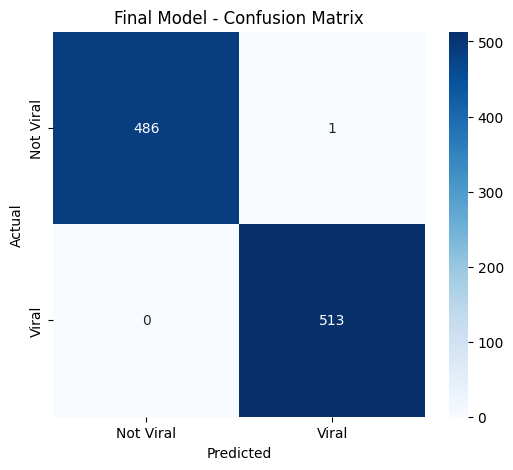

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Viral', 'Viral'], yticklabels=['Not Viral', 'Viral'])
plt.title("Final Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()